In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Make a blank data frame.
df = pd.DataFrame()

# Populate it with data.
df['age'] = [28, 42, 27, 24, 35, 54, 35, 37]

# Mean

The mean represents the average value within a variable, and is computed as the sum of the individual datapoints in a variable x divided by the total number of values in a variable n. It is sometimes also referred to as the "expected value" of a variable.

mean = sum(x) / n
Here are two ways you can compute the mean of our age data, first with built-in Python functionality and then with NumPy.

In [2]:
#using built in python fucntionality
sum(df['age']) / len(df['age'])

35.25

In [3]:
#usint NumPy
import numpy as np

np.mean(df['age'])

35.25

The mean is easy to understand and commonly used, but it's sensitive to extreme values: one abnormally large value in a set of otherwise small values will cause the mean to become much larger.

# Median

The median represents the middle value in a variable when the values are ordered from least to greatest. If there are an odd number of values in a variable, then the median is the middle value, and if there are an even number of values in a variable, the median represents the average of the two middlemost values.

Here's how you can compute the median of our age data using the statistics module of the Python standard library or NumPy.

In [4]:
#Vanilla Python using the built-in statistics module
import statistics

statistics.median(df['age'])

35.0

In [5]:
#Using NumPy
np.median(df['age'])

35.0

The median, like the mean, easy to understand, and has the added benefit that it isn't sensitive to extreme values. However, the median has fewer useful mathematical properties than the mean as we'll see later.

# Mode

The mode represents the value in a variable that occurs the most frequently.

In [6]:
# Return the mode using the statistics module
import statistics
statistics.mode(df['age'])

35

If two or more values in a variable occur with equal frequency, there will be multiple modes. Note the code above will raise a StatisticsError if you run it on data containing multiple modes. Receiving this error, or generating and inspecting a list of counts beforehand, will show whether there is more than one mode to look for.

In [7]:
# Generate a list of unique elements along with how often they occur.
(values, counts) = np.unique(df['age'], return_counts=True)

# The location in the values list of the most-frequently-occurring element.
ind = np.argmax(counts)

# The most frequent element.
values[ind]

35

The code above will handle data with multiple modes without raising an exception, but you'll get back just the first mode. If you want to push your understanding of Python you can challenge yourself to revise it to give you all of the modes.

# Measures of Variance

While measures of central tendency are important, on their own they are not enough to describe a variable. Another piece of information is equally vital: variance.
The variance of a variable describes how much values differ from the central tendency, and how much they differ from each other. If all the values in a variable are close to the central tendency, then variance is said to be low. If values in a variable vary widely, with some far away from the central tendency, variance is said to be high.

Variance v is measured as the sum of the squared difference of each individual datapoint x from the mean, divided by the number of datapoints n minus 1.
v = sum((x - mean) ** 2) / (n - 1)

In [13]:
df['age'].var()

92.5

In [14]:
np.var(df.age)

80.9375

# Standard deviation
The most common estimate of variability used by statisticians is the square root of the variance, called the standard deviation. The standard deviation has some useful mathematical properties that we will review in the Central Limit Theory lesson later in this Unit.

s = v ** 0.5
NumPy gives us the useful np.std() function for working with standard deviations. A tricky default in numpy is to calculate the population standard deviation, dividing by n, rather than the sample standard deviation, dividing by n - 1. To calculate the sample instead of the population standard deviation we need to manually set the "delta degrees of freedom" with the ddof named parameter:

In [15]:
np.std(df['age'], ddof=1)

9.617692030835672

Another useful estimate of variance is the standard error, which quantifies uncertainty in the estimate of the sample mean. While the standard deviation tells us about variance in the population, the standard error tells us about the precision of our sample mean estimate.

One example of standard errors at work is poll results, where they are called the "margin of error". For example, a poll might report that 44% of respondents were in favor of measure X, with a margin of error (standard error) of 3%. In other words, if the poll were run over and over again with new samples of respondents, the average response would fall between 41% (44-3) and 47% (44+3). Smaller standard errors mean more precise estimates.

The formula for the standard error se of the mean is the standard deviation of the sample s divided by the square root of the sample size n.

se = s / (n ** 0.5)

In [16]:
np.std(df['age'], ddof=1) / np.sqrt(len(df['age']))

3.4003676271838605

Let's examine sampling from different distributions of low and high variance. We'll create two variables, one with low variability and one with high variability, and see how they differ.

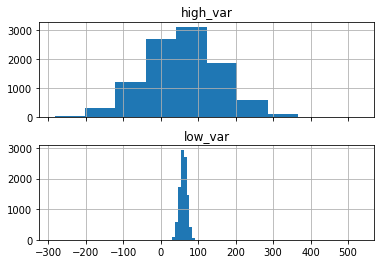

low_var     100.321512
high_var    529.199218
dtype: float64
low_var      21.48995
high_var   -283.67852
dtype: float64


In [17]:
# First, create an empty dataframe to store your variables-to-be.
pop=pd.DataFrame()

# Then create two variables with mean = 60, one with a low standard
# deviation (sd=10) and one with a high standard deviation (sd=100).
pop['low_var']=np.random.normal(60, 10, 10000)
pop['high_var']=np.random.normal(60, 100, 10000)

# Finally, create histograms of the two variables.
pop.hist(layout=(2, 1), sharex=True)
plt.show()

# Calculate and print the maximum and minimum values for each variable.
print(pop.max())
print(pop.min())

The variable with high variance has a much wider range of possible values than the variable with low variance. If these variables represented two populations we wanted to study, we would take samples from each, then generalize from those samples to get information about the populations. Let's try that next.

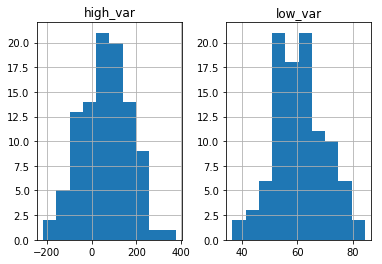

low_var     60.733691
high_var    63.506410
dtype: float64
low_var       9.082516
high_var    104.890094
dtype: float64


In [19]:
# Take a random sample of 100 observations from each variable
# and store it in a new dataframe.
sample=pd.DataFrame()
sample['low_var'] = np.random.choice(pop['low_var'], 100)
sample['high_var']=np.random.choice(pop['high_var'], 100)

# Again, visualize the data. Note that here we're using a pandas method to 
# create the histogram.
sample.hist()
plt.show()

# Check how well the sample replicates the population.
print(sample.mean())
print(sample.std(ddof=1))

Since the sample is randomly drawn from the population, you can re-run the code as many times as you like and always get a new sample. Try this a few times. You will notice that the low variability samples are closer to the population mean and standard deviation than the high variability samples. Each time a sample is drawn from each population, there is a chance to draw values from the tail ends of the distribution – extremely high values, or extremely low values. Having extreme values in the sample can pull the sample mean away from the population mean. Since the high variability variable has values that are much more extreme than the low variability variable, the estimates have the potential to fall farther from the mean.

Happily, since the extreme values are spread equally across "extremely high" and "extremely low," even multiple samples from a high variability population will eventually converge on the true mean… it will just take a bit longer.

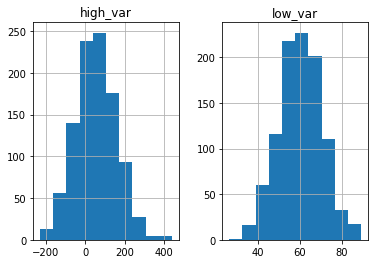

low_var     60.292875
high_var    55.098735
dtype: float64
low_var      10.186915
high_var    101.937191
dtype: float64


In [21]:
# Sample 1000
sample=pd.DataFrame()
sample['low_var'] = np.random.choice(pop['low_var'], 1000)
sample['high_var']=np.random.choice(pop['high_var'], 1000)

# Again, visualize the data. Note that here we're using a pandas method to 
# create the histogram.
sample.hist()
plt.show()

# Check how well the sample replicates the population.
print(sample.mean())
print(sample.std(ddof=1))

# Summarizing data with Pandas

In [22]:
import numpy as np
import pandas as pd
%matplotlib inline

# Set up the data
data = pd.DataFrame()
data['gender'] = ['male'] * 100 + ['female'] * 100
data['height'] = np.append(np.random.normal(69, 8, 100), np.random.normal(64, 5, 100))
data['weight'] = np.append(np.random.normal(195, 25, 100), np.random.normal(166, 15, 100))

data.head()

,gender,height,weight
0,male,71.870702,164.072153
1,male,62.554866,187.403675
2,male,69.937810,204.930187
3,male,75.769155,208.357023
4,male,69.080350,194.218374


In [23]:
data.height.mean()

66.08982605868083

In [24]:
data.height.std()

6.74422506368747

In [25]:
data.describe()

,height,weight
count,200.000000,200.000000
mean,66.089826,182.715845
std,6.744225,24.278604
min,49.146483,123.428943
25%,61.113427,166.452902
50%,65.490012,178.860629
75%,69.650794,198.005894
max,88.200960,253.270198


Together, these values give us a decent image of what each of the variables included looks like. We can get a numerical sense of what we might call their "shape". However, this is only one part of .describe()'s capabilities. As we covered in the toolkit unit, we can also group our data. This allows us to be even more insightful with our describe, letting us compare the summary statistics for two different groups of our data.

In [26]:
data.groupby('gender').describe()

height                                                        \
        count       mean       std        min        25%        50%   
gender                                                                
female  100.0  64.248717  5.277949  49.146483  60.734090  64.267473   
male    100.0  67.930935  7.531534  53.318238  61.867182  67.542613   

                             weight                                     \
              75%        max  count        mean        std         min   
gender                                                                   
female  67.272879  76.382687  100.0  168.296370  14.845130  128.879763   
male    73.282525  88.200960  100.0  197.135319  23.333121  123.428943   

                                                        
               25%         50%         75%         max  
gender                                                  
female  160.138786  168.324718  177.920337  207.377014  
male    180.189025  195.205094  213.407515  253.270198

### Value Counts
Sometimes, you aren't dealing with data that is best summarized in this form. The most common example of this is strings, where these kinds of methods do not apply. In that case what you're probably interested in is counts. Python gives you an easy way to go over a column of data and return the distinct values as well as the counts of each.

In [27]:
data.gender.value_counts()

female    100
male      100
Name: gender, dtype: int64

Now, the first thing to note is that this method is working on data.gender, which is a series object rather than a data frame object. This .value_counts() method cannot iterate over a whole data frame. Luckily each column and row in a data frame is a series and you can use this method simply by selecting a column as we did above.

There are several reasons to use this method. Firstly, it gives you another way to make sense of your data. In this case it shows us that our data is evenly balanced between males and females, with one hundred samples of each.

There are plenty of other ways this function could be useful. It can show outliers or possible malformed data. For example, if we were to see something like 'Mal' with a single entry, we'd have found a typo in the data. This method works over both numerical and object data, though it is not valuable for running over the numeric columns in this example. Can you think of why?

In [28]:
data.weight.value_counts().head()

189.476182    1
163.992446    1
169.391433    1
189.857602    1
200.187544    1
Name: weight, dtype: int64

As you can see, it's not useful because we're dealing with truly continuous random data, so no value is exactly repeated. We simply get a list of all the values with a count of 1 for each.

However, these two methods, .describe() and .value_counts(), do often provide incredibly easy and valuable insights into your dataset. You'll want to use them throughout the course as one of the ways to get a first, quick sense of the data before digging in more specifically on points of interest.

In [29]:
import numpy as np
import pandas as pd
%matplotlib inline

# Set up the data
data = pd.DataFrame()
data['gender'] = ['male'] * 100 + ['female'] * 100
data['height'] = np.append(np.random.normal(69, 8, 100), np.random.normal(64, 5, 100))
data['weight'] = np.append(np.random.normal(195, 25, 100), np.random.normal(166, 15, 100))

data.head()

,gender,height,weight
0,male,59.601069,141.273320
1,male,68.522724,154.280453
2,male,82.008607,209.761912
3,male,61.087178,187.197402
4,male,80.867066,200.874871


## Assignments
Now that we have introduced some tools for describing populations, let's try them out. First do these drills by hand, then use the Python code we've provided in the previous assignments to check your work. Keep track of your work in a Google document or markdown file that you can submit below and share with your mentor.

Greg was 14, Marcia was 12, Peter was 11, Jan was 10, Bobby was 8, and Cindy was 6 when they started playing the Brady kids on The Brady Bunch. Cousin Oliver was 8 years old when he joined the show. What are the mean, median, and mode of the kids' ages when they first appeared on the show? What are the variance, standard deviation, and standard error?

Using these estimates, if you had to choose only one estimate of central tendency and one estimate of variance to describe the data, which would you pick and why?

Next, Cindy has a birthday. Update your estimates- what changed, and what didn't?

Nobody likes Cousin Oliver. Maybe the network should have used an even younger actor. Replace Cousin Oliver with 1-year-old Jessica, then recalculate again. Does this change your choice of central tendency or variance estimation methods?

On the 50th anniversary of The Brady Bunch, four different magazines asked their readers whether they were fans of the show. The answers were: TV Guide 20% fans Entertainment Weekly 23% fans Pop Culture Today 17% fans SciPhi Phanatic 5% fans

Based on these numbers, what percentage of adult Americans would you estimate were Brady Bunch fans on the 50th anniversary of the show?

Discuss your answer to each of these questions, along with your code, with your mentor.

When you've given it a try, you can find a solution here.

In [32]:
data = pd.DataFrame()
data['Name'] = ['Greg','Marcia','Peter', 'Jan', 'Bobby', 'Cindy', 'Oliver'] 
data['Age'] = [14,12,11,10,8,6,8]


print(data)

     Name  Age
0    Greg   14
1  Marcia   12
2   Peter   11
3     Jan   10
4   Bobby    8
5   Cindy    6
6  Oliver    8


In [33]:
np.mean(data['Age'])

9.857142857142858

In [35]:
np.median(data['Age'])

10.0

In [36]:
import statistics
statistics.mode(data['Age'])

8

In [37]:
data['Age'].var()

7.476190476190475

In [39]:
np.var(data.Age)

6.408163265306122

In [40]:
np.std(data['Age'], ddof=1) #standard deviation

2.734262327610589

In [41]:
np.std(data['Age'], ddof=1) / np.sqrt(len(data['Age'])) #Standard Error

1.0334540197243192

2 - I would use the Mean to describe the data set because there are no large outliers in the data 
/ I would choose the standard deviation as the estimate of variance because there is a low variance in this data set

3. Next, Cindy has a birthday. Update your estimates- what changed, and what didn't?

In [54]:
data2 = pd.DataFrame()
data2['Name'] = ['Greg','Marcia','Peter', 'Jan', 'Bobby', 'Cindy', 'Oliver'] 
data2['Age'] = [14,12,11,10,8,7,8]


print(data2)

     Name  Age
0    Greg   14
1  Marcia   12
2   Peter   11
3     Jan   10
4   Bobby    8
5   Cindy    7
6  Oliver    8


In [44]:
np.mean(data2['Age'])

10.0

In [45]:
np.median(data2['Age'])

10.0

In [47]:
statistics.mode(data2['Age'])

8

In [49]:
data2['Age'].var()
np.var(data2.Age)

5.428571428571429

In [50]:
np.std(data2['Age'], ddof=1) #standard deviation

2.516611478423583

In [51]:
np.std(data2['Age'], ddof=1) / np.sqrt(len(data2['Age'])) #Standard Error

0.9511897312113418

The mean increased as 1 more year was added to the total ages
The Median stayed the same as the middle number did not change
The Mode stayed the same because 8 was the most common occuring age still
The variance decreased as the total ages combined were increased without adding another data point
The std dev decreased as the ages moved closer together
The std error decreased as the ages moved closer together

4. Nobody likes Cousin Oliver. Maybe the network should have used an even younger actor. Replace Cousin Oliver with 1-year-old Jessica, then recalculate again. Does this change your choice of central tendency or variance estimation methods?

In [53]:
data3 = pd.DataFrame()
data3['Name'] = ['Greg','Marcia','Peter', 'Jan', 'Bobby', 'Cindy', 'Jessica'] 
data3['Age'] = [14,12,11,10,8,7,1]


print(data3)

      Name  Age
0     Greg   14
1   Marcia   12
2    Peter   11
3      Jan   10
4    Bobby    8
5    Cindy    7
6  Jessica    1


In [57]:
np.mean(data3['Age'])

9.0

In [58]:
np.median(data3['Age'])
#statistics.mode(data3['Age'])

10.0

In [62]:
np.var(data3.Age)

15.428571428571429

In [63]:
np.std(data3['Age'], ddof=1) #standard deviation

4.242640687119285

In [64]:
np.std(data3['Age'], ddof=1) / np.sqrt(len(data2['Age'])) #Standard Error

1.6035674514745462

Given the addition of Jessica I would use the Median as choice of central tendency due to Jessica being an outlier in the data set and pulling the mean down
I would also now chose the std dev due to the higher variance in the data set now

5. On the 50th anniversary of The Brady Bunch, four different magazines asked their readers whether they were fans of the show. The answers were: TV Guide 20% fans Entertainment Weekly 23% fans Pop Culture Today 17% fans SciPhi Phanatic 5% fans

Based on these numbers, what percentage of adult Americans would you estimate were Brady Bunch fans on the 50th anniversary of the show?

In [70]:
(20+23+17+5) / 4 # mean

16.25

I would guess 20% of adult americans were Brady Bunch fans

In [71]:
(17+23)/2 #median

20.0

### Answers

In [72]:
import numpy as np
ages =[14,12,11,10,8,6,8]

def summarystats(ages):
    print("mean: ",np.mean(ages))
    print("median: ",np.median(ages))
    print("variance: ",np.var(ages))
    print("std. deviation :",np.std(ages))
    print("standard error :",np.std(ages)/np.sqrt(len(ages)-1))
    
summarystats(ages)
print("Mode is 8")

mean:  9.857142857142858
median:  10.0
variance:  6.408163265306122
std. deviation : 2.531435020952764
standard error : 1.0334540197243194
Mode is 8


In [73]:
#mean and standard deviation are fine as mean and median are close

In [75]:
ages2 =[14,12,11,10,8,7,8]
summarystats(ages2)
print("Mode is 8")

mean:  10.0
median:  10.0
variance:  5.428571428571429
std. deviation : 2.32992949004287
standard error : 0.951189731211342
Mode is 8


In [76]:
ages3 =[14,12,11,10,8,7,1]
summarystats(ages3)
print("There is no mode")

mean:  9.0
median:  10.0
variance:  15.428571428571429
std. deviation : 3.927922024247863
standard error : 1.6035674514745466
There is no mode


In [77]:
#mean and median diverge due to outlier- use median

In [78]:
# SciPhi Fanatic is a special interest magazine (scifi)
# whereas the others are more general and represent
# a better sample
# so we average those three
# answer: 20%, approximately